# Data  Understanding
This data was sourced from the Zillow Research Page and is part of the Zillow Housing Dataset.
The dataset contains various attributes related to real estate, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and monthly prices.

### Column Descriptions:

- **RegionID**: A unique identifier for each region.
- **SizeRank**: A ranking based on the size of the region.
- **RegionName**: The zip code of the region.
- **RegionType**: The type of region, which is a zip code in this dataset.
- **StateName**: The state where the region is located.
- **City**: The specific city name for the housing data.
- **Metro**: The name of the metropolitan.
- **CountyName**: The county name for the region.

## Load the Data and Importing the libraries

In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import  numpy as np
import re
# !pip install tensorflow
# import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, GRU, SimpleRNN
# 

In [49]:
df= pd.read_csv(r"C:\Users\user\Desktop\Phase_4_project\zillow_data.csv")

df.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [50]:
df["State"].nunique()

51

In [51]:
df.shape

(14723, 272)

In [52]:
date=df.iloc[:, 265:272]


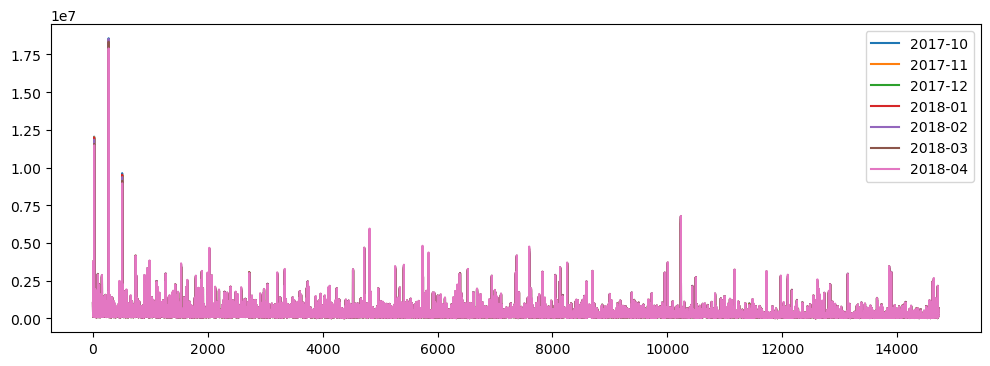

In [53]:
date.plot(figsize=(12,4));

In [54]:
# calculating and creating a new column -ROI
# ROI is a measure of returns expected from investments.

# Coefficient of variation (CV)
# CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. 
# It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [55]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326


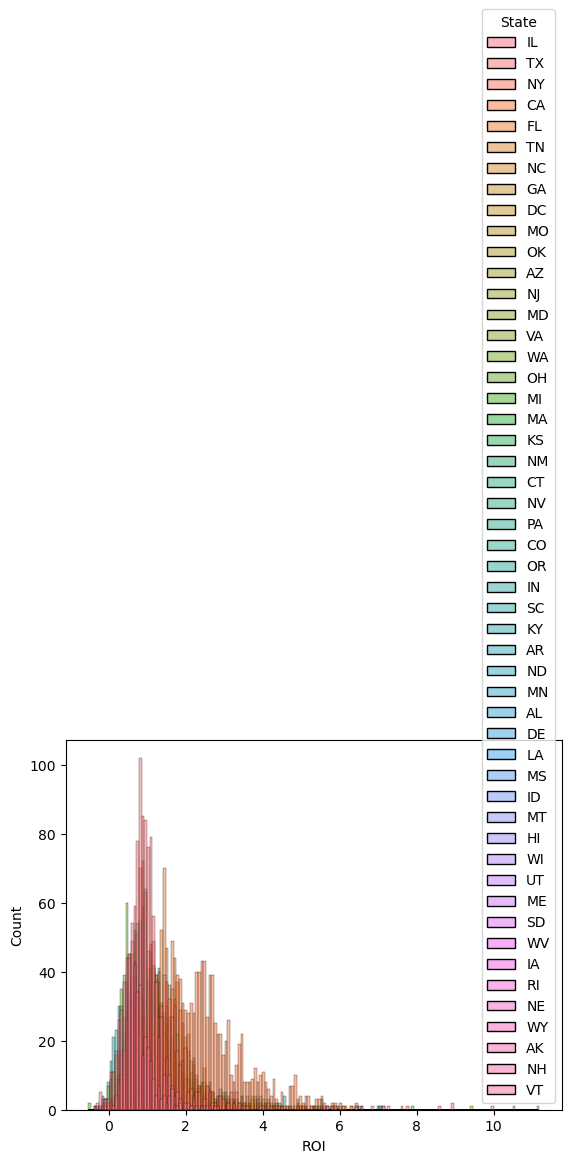

In [56]:
sns.histplot(data=df, x="ROI", hue="State")
plt.show()

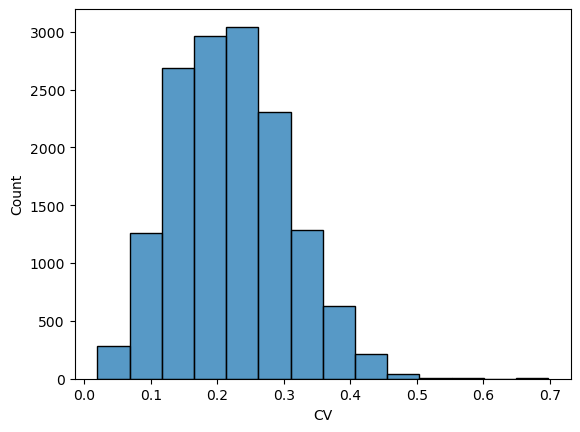

In [57]:
sns.histplot(data=df, x="CV", kde=False, bins=14)
plt.show()

In [63]:
sns.histplot(data=df, x="ROI" kde =False, bins=12)
plt.show()

SyntaxError: invalid syntax (3598775689.py, line 1)

In [59]:

# Function to melt the DataFrame from wide to long view
def melt_df(data):
    # Identify date columns
    non_date_cols = ['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'CV']
    date_columns = [col for col in data.columns if col not in non_date_cols]
    
    # Melt the DataFrame
    melted = pd.melt(data, id_vars=non_date_cols, value_vars=date_columns, var_name='Date')
    
    # Try to parse the date
    try:
        melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True, errors='coerce')
    except ValueError as e:
        print(f"Error parsing date: {e}")
    
    # Drop rows with NaT in 'Date' or NaN in 'value'
    melted = melted.dropna(subset=['value', 'Date'])
    
    return melted

# Copy the original DataFrame
new_df = df.copy()

# Melt the DataFrame
new_df = melt_df(new_df)

# Set the 'Date' column as index
new_df.set_index('Date', inplace=True)

# Rename the 'value' column to 'median_houseprice'
new_df.rename(columns={'value': 'median_houseprice'}, inplace=True)

# Display the final cleaned data
print(new_df.head())


            RegionID      City State              Metro CountyName  SizeRank  \
Date                                                                           
1996-04-01     84654   Chicago    IL            Chicago       Cook         1   
1996-04-01     90668  McKinney    TX  Dallas-Fort Worth     Collin         2   
1996-04-01     91982      Katy    TX            Houston     Harris         3   
1996-04-01     84616   Chicago    IL            Chicago       Cook         4   
1996-04-01     93144   El Paso    TX            El Paso    El Paso         5   

                 ROI        CV  median_houseprice  
Date                                               
1996-04-01  2.083782  0.256487           334200.0  
1996-04-01  0.365295  0.152680           235700.0  
1996-04-01  0.567966  0.143950           210400.0  
1996-04-01  1.623971  0.237364           498100.0  
1996-04-01  0.571798  0.178326            77300.0  


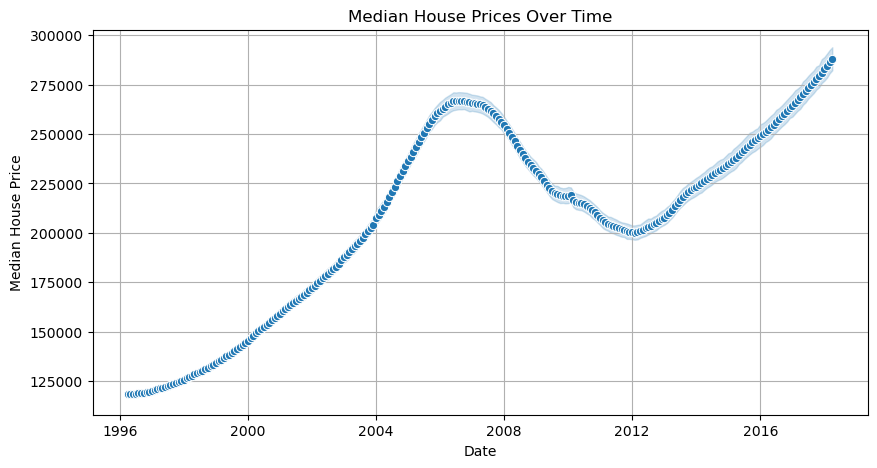

In [60]:

# Resetting index for seaborn compatibility
new_df.reset_index(inplace=True)

# Plotting using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x='Date', y='median_houseprice', marker='o')

# Customizing the plot
plt.title('Median House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.grid(True)
# plt.xticks(rotation=45)
plt.show()

## Data Preview and Cleaning

In [61]:
def get_datetimes(df, start_col=7, date_format='%Y-%m'):
    """
    Converts column names from start_col onwards to datetime objects.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    start_col (int): The starting column index from which to convert column names to datetime.
    date_format (str): The datetime format of the column names.
    
    Returns:
    pd.DataFrame: DataFrame with datetime-converted columns starting from start_col.
    """
    try:
        # Extract column names to be converted
        date_columns = df.columns.values[start_col:]
        # Convert to datetime
        datetime_index = pd.to_datetime(date_columns, format=date_format)
        # Rename the columns with the datetime index
        new_columns = list(df.columns[:start_col]) + list(datetime_index)
        df.columns = new_columns
        return df
    except Exception as e:
        print(f"Error converting columns to datetime: {e}")
        return None



# Apply the function to convert the appropriate columns to datetime
df = get_datetimes(df, start_col=7)



Error converting columns to datetime: time data ROI doesn't match format specified


In [62]:
df.shape # checking the number of rows and columns in the dataframe

AttributeError: 'NoneType' object has no attribute 'shape'

The datset contains 14723 rows and 272 columns

In [ ]:
df.select_dtypes(include='object').info() #concise summary of object datatypes only

The Metro column contains null values we proceed to check the percentage of missing values in this column

In [ ]:
df.select_dtypes(include='int64').info() 

In [ ]:
df.select_dtypes(include='float64').info() 

###  Dealing with missing values

In [ ]:
#checking the percentage of missing values in columns that have object data types
df.select_dtypes(include='object').isna().sum()/len(df) *100

The Metro column contains  approximately 7%  of missing values. We drop these specific rows since the percentage of missing values is too small and replacing the null values with the word 'missing' would make the Time series modelling more complex in making predictions.

In [ ]:
df.dropna(subset=['Metro'], axis=0, inplace=True)# Dropping the missing values

In [ ]:
#checking the percentage of missing values in columns that have integer data types
df.select_dtypes(include='int64').isna().sum()/len(df) *100


In [ ]:
#checking the percentage of missing values in columns that have float data types
df.select_dtypes(include='float64').isna().sum()/len(df) *100


In [ ]:
# Interpolate missing values
df.interpolate(method='linear', inplace=True)


In [ ]:
print(f'The data has {df.isna().sum().sum()} missing values')

### Dealing with duplicates

In [ ]:
df.duplicated().sum() 

In [ ]:
df.select_dtypes(include='object').describe().T

In [ ]:
df.select_dtypes(include='float64').describe().T

In [ ]:
# X=df.drop(columns = ['City', 'State', 'CountyName'], axis=1, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date',inplace = True)

In [ ]:
# create a stationarity function 
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=6, center=False).mean()
    roll_std = TS.rolling(window=6, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [ ]:


monthly_data = df.resample('MS').mean()['value']

# Checking the stationarity of our series

stationarity_check(monthly_data)